In [126]:
from numpy import sin, cos
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [144]:
class Pendulum:

    def __init__(self, Δx, θ_0, ω_0, r = 1):
        self.ℓ = 0.1
        self.g = 9.8
        self.θ = [θ_0]
        self.ω = [ω_0]
        self.r = r
        self.Δx = Δx

    # Returns the gradient of theta (omega)
    def θGrad(self, θ, ω):
        return ω

    # Returns the gradient of omega (omega')
    def ωGrad(self, θ, ω):
        return -1*self.g/self.ℓ*sin(θ)
        
    # Update theta and omega for timestep delta, according to the Euler method.

    def IntegrateStep(self, delta):
        """
        Append new theta and omega states to the internal lists, which result from
        the time step delta. Integration done via the Runge–Kutta Method.
        """
        j, k = {}, {}
      
        j[0] = k[0] = 0

        for i in [1, 2, 3, 4]:
            h = delta/2 if i == 2 or i == 3 else delta

            for (var, func) in [(j, self.θGrad),(k, self.ωGrad)]:
                
                var[i] = func(self.θ[-1] + h*var[i-1], self.ω[-1] + h*var[i-1])
        
        for (var, state) in [(j, self.θ), (k, self.ω)]:
            
            state.append(state[-1] + h/6*(var[1] + 2*var[2] + 2*var[3] + var[4]))
    
        return
    
    
    def Transform(self, θ):
        return (self.ℓ*sin(θ)+self.Δx, -self.ℓ*cos(θ))
    
    def MakeArtists(self):
        (x, y) = self.Transform(self.θ[-1])
        
        mass, = plt.plot(x, y, 'o', color='k',  markersize=30)
        string, = plt.plot([self.Δx, x], [0, y], '-', color='k')
        
        return [mass, string]
    
class Cradle:
    
    def __init__(self, n):
        self.pendulums = self.initialise_pends(n)
        
    def initialise_pends(self, n):
        pendulums = []
        
        Δx = 0
        for i in range(n):
            pendulums.append(Pendulum(Δx, 0.1, 0))
            Δx += 0.02

        return pendulums
    

In [151]:
from matplotlib import animation
from IPython.display import HTML
from numpy import arange

def plot_physics(timeinterval):
    t_step = 0.001
    t_domain = arange(0, timeinterval, t_step)
    last_frame = 0
    frame_length = 1/60
    
    cradle = Cradle(2)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect(aspect=1)

    plt.ylim((-0.12, 0.02))
    plt.xlim((-.1, 0.1))

    ## initialise environment
    
    object_instances = []
    for t in t_domain:
        
        
        for pend in cradle.pendulums:
            pend.IntegrateStep(t_step)
        
        if t - last_frame >= frame_length:
            objects = []
            for pend in cradle.pendulums:
                objects += pend.MakeArtists()
            object_instances.append(objects)
            last_frame = t
    
    ani = animation.ArtistAnimation(fig, object_instances, interval=frame_length*1000, repeat_delay=1)

    return HTML(ani.to_html5_video())

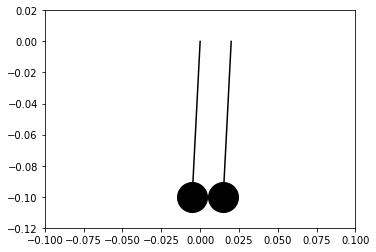

In [153]:
plot_physics(5)

Today I achieved the milestones in the plan;

 - Use the single pendulum class as a starting point, use it to replicate the lab results in ```matplotlib```
 - Create a ``matplotlib.artist`` to draw the system 
 - (2)
 - Add two pendulums swinging simultaneously on the same plot

With too larger timestep used in the integration method, the system diverges from real behavior and it gains energy. With my initial method I was plotting the objects each time the ```IntegrateStep``` method was called - this resulted in long computation times. For smooth motion to appear to a human, we only need to plot 60 frames per second or so. So I have decided to call ```MakeArtists``` only once every 1/60 simulated seconds to achieve this - this significantly reduces computation time.